In [1]:
#Problem 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(pd.read_csv('diabetes.csv'))
df.head()
y = df.pop('Outcome')
x = df.copy()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .8, test_size = .2)

In [4]:
scaler = StandardScaler()
x_Newtrain = scaler.fit_transform(x_train)
x_Newtest = scaler.fit_transform(x_test)
x_New = np.array(x)
x_New = scaler.fit_transform(x_New)

Accuracy: 77.600% (2.777%)
Accuracy: 77.604% (5.036%)
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       108
           1       0.69      0.67      0.68        46

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



Text(0.5, 257.44, 'Predicted label')

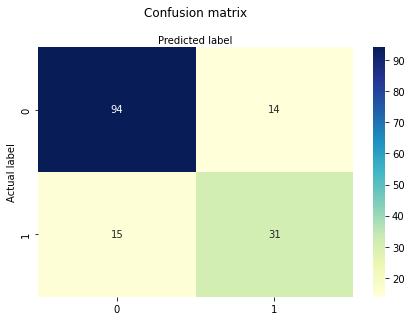

In [5]:
K = [5, 10]

for k in K:
    kfold = KFold(n_splits = k, random_state=0, shuffle=True)
    model = LogisticRegression(solver='liblinear')
    results = cross_val_score(model,x_New,y, cv=kfold)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100))
    
    model.fit(x_Newtrain,y_train)
    
    predicted = model.predict(x_Newtest)
    matrix = confusion_matrix(y_test,predicted)
    report = classification_report(y_test,predicted)

print(report)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu",fmt ='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')